In [ ]:
import torch #Redes neuronales
import pandas as pd
from torchvision.models import resnet50
from PIL import Image
from torchvision.datasets import ImageFolder #Localizar una carpeta y sus imagenes
from torch.utils.data import DataLoader #Genera un "generador"
from torch.nn import CrossEntropyLoss #Loss function
from torch.optim import SGD #Stochastic gradient descent

In [2]:
torch.cuda.is_available()

False

In [1]:
#torch.cuda.current_device()

In [ ]:
#torch.cuda.get_device_name(0)

AssertionError: Torch not compiled with CUDA enabled

In [6]:
evice = torch.device("cpu")

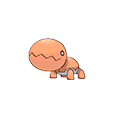

In [8]:
img = Image.open("C://Users//sebas//Downloads//archive (10)//images//trapinch.png") #Open image
img.thumbnail(size=(120,120)) #Make thumnbial
img

In [10]:
model = resnet50(weights="IMAGENET1K_V1") #Instanciamos el objeto
#model.to(device)

In [12]:
preprocessing = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.224, 0.225])
])

NameError: name 'transforms' is not defined

In [ ]:
img_transformed = preprocessing(img).to(device)

In [ ]:
batch = torch.unsqueeze(img_transformed, 0)
#Agregar una dimension al principio para generar un batch
batch.shape

In [ ]:
model.eval() #Modelo en modo evaluación
y_prob = model(batch) 
y_prob.shape #Me genera la siguiente predicción

In [ ]:
index = y_prob.argmax().item()
#Cual es el valor mas grande
imagenet_labels.iloc[index]
#Lo buscamos en el dataframe de las etiquetas

In [ ]:
train_folder = ImageFolder("C://Users//sebas//Downloads//archive (10)//images/train", transform=preprocessing) #Train
val_folder = ImageFolder("C://Users//sebas//Downloads//archive (10)//images/val", transform=preprocessing) #Val

In [ ]:
#Generadores
train_loader = DataLoader(train_folder, batch_size=32)
val_loader = DataLoader(val_folder, batch_size=32)
#Generadores de imagenes con batch size = 32
# (tamaño de cada lote)

In [ ]:
for params in model.parameters():
    params.requires_grad = False
    #Congelar los gradientes de mi red

In [ ]:
model.fc = torch.nn.Linear(model.fc.in_features, 2)
#Reemplazar la capa final de la red por una nueva
model

In [ ]:
loss_fn = CrossEntropyLoss()
optimizer = SGD(params=model.fc.parameters(), lr=1e-4)

In [ ]:
model.to(device) #Mover el modelo a la GPU
train_losses = []
val_losses = []
epochs = 10 #Seteamos un número de épocas
for epoch in range(epochs):
    model.train() #Modo entrenamiento
    train_loss = 0
    for inputs, labels in train_loader:
        #Montar los datos en la GPU
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad() #Limpiar los gradientes
        y_prob = model(inputs) #Forward pass
        loss = loss_fn(y_prob, labels) #Calcular la loss
        loss.backward() #Backward pass
        optimizer.step() #Actualizar los pesos
        train_loss += loss.item() #Sumatoria
    #Promediamos
    train_loss = train_loss / len(train_loader)
    train_losses.append(train_loss) #Guardar la loss de training
    model.eval() #Modo evaluación
    val_loss = 0
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device) #Montar los datos en la GPU
        y_prob = model(inputs) #Forward pass
        loss = loss_fn(y_prob, labels) #Calcular la loss
        val_loss += loss.item()
    #Promediamos
    val_loss = val_loss / len(val_loader)
    val_losses.append(val_loss) #Guardar la loss de validacion
    print(f"Epoch {epoch}, Train Loss: {train_loss}, Val Loss: {val_loss}")

In [ ]:
import seaborn as sns
sns.lineplot(x = range(epochs), y= train_losses, label = "Train Loss")
sns.lineplot(x = range(epochs), y= val_losses, label = "Val Loss")

In [ ]:
batch.shape #Foto del snoopy
model.eval() #Modo evaluación
y_prob = model(batch) #Evaluamos el modelo con la imagen del snoopy
y_prob

In [ ]:
from torch.nn import Softmax
softmax = Softmax(dim=1) #Softmax para convertir a probabilidades
y_prob = softmax(y_prob)
y_prob = y_prob.cpu().detach().numpy() #Convertir a numpy
pd.DataFrame(y_prob, columns=["pokemon", ], index=["pokemon"])